Длина основной части отличается от длины референса (29903). Края откусаны секвенированием

In [1]:
import sys

import pandas as pd

sys.path.append("../sourse/")
from filter_fasta_from_dublicates_and_NNN import read_fasta_generator

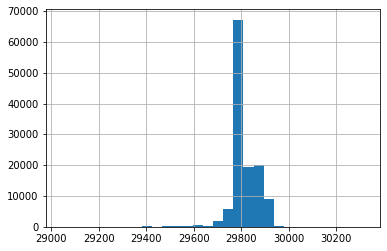

In [9]:
fastapath = "../data/gisaid_from_2020_11_22_to_2021_01_22.fasta"
fasta = read_fasta_generator(fastapath)

seq_lens = []
for header, seq in fasta:
    seq_lens.append(len(seq.replace('\n', '')))

df = pd.Series(seq_lens)
df.hist(bins=30);

In [11]:
df.value_counts().iloc[:10]

29782    49627
29903     4954
29865     4375
29836     3354
29776     2677
29781     2381
29766     1574
29891     1447
29840     1164
29849     1148
dtype: int64

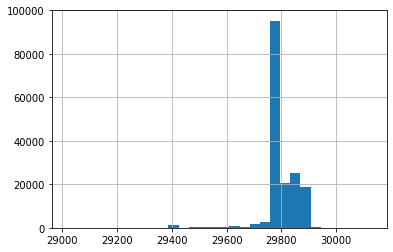

In [12]:
fastapath = "../data/gisaid_hcov-19_2020_11_29_high_qualily.fasta"
fasta = read_fasta_generator(fastapath)

seq_lens = []
for header, seq in fasta:
    seq_lens.append(len(seq.replace('\n', '')))

df = pd.Series(seq_lens)
df.hist(bins=30);

In [13]:
df.value_counts().iloc[:10]

29782    82558
29903     5261
29865     2893
29836     2588
29813     2419
29776     2120
29775     1994
29779     1476
29840     1399
29812     1259
dtype: int64

In [14]:
reference_fasta_gen = read_fasta_generator("../data/covid_ref.fasta")
header, seq = next(reference_fasta_gen)
header = header.strip()
seq = seq.replace('\n', '')
seq = seq.replace("T", "U")

print(header)
print(len(seq))

>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
29903


In [15]:
part_150_294 = "UCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUUGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGA"

In [19]:
print(seq[150 - 1:294])
print(part_150_294)

UCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGA
UCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUUGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGA


In [20]:
for i, (s1, s2) in enumerate(zip(seq[150 - 1:294], part_150_294)):
    if s1 != s2:
        print(i, s1, s2)

91 C U
